In [8]:
import pandas as pd
NH3 = pd.read_excel('data/depth profile.xlsx', sheet_name='#1').iloc[:,1:]
N2 = pd.read_excel('data/depth profile.xlsx', sheet_name='#3').iloc[:,1:]
NH3.head()

,Etch Time (EtchTime),C1s,N1s,O1s,Si2p,Cl2p
0,0.000,10.624300,37.4239,18.20440,33.5097,0.237634
1,36.020,1.182070,49.2723,4.22913,45.0981,0.218383
2,72.046,0.797767,49.7164,3.56758,45.6969,0.221331
3,108.088,1.037640,49.7553,3.30661,45.6674,0.233072
4,144.118,1.094640,49.6492,3.33637,45.6651,0.254686


In [9]:
N2.head()

,Etch Time (EtchTime),C1s,N1s,O1s,Si2p,Cl2p
0,0.000,13.50750,24.2369,30.4677,29.9671,1.82077
1,44.038,1.92377,28.9560,24.0986,41.8549,3.16670
2,88.070,2.06794,28.8439,23.5196,42.0711,3.49744
3,132.103,2.39468,28.7495,23.0778,42.0950,3.68296
4,176.150,2.50107,29.2394,22.1793,42.2038,3.87640


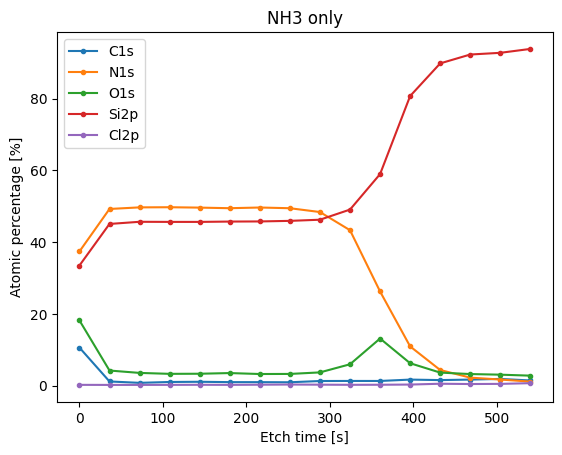

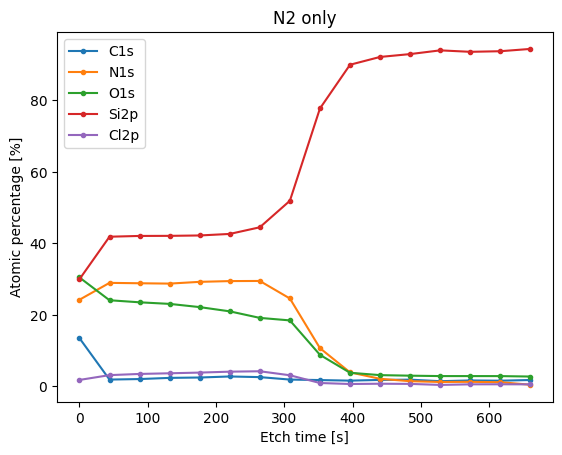

In [18]:
import matplotlib.pyplot as plt
for idx, col in enumerate(NH3.columns[1:]):
    plt.plot(NH3['Etch Time (EtchTime)'], NH3[col], '.-', label=NH3.columns[idx+1])
plt.xlabel('Etch time [s]')
plt.ylabel('Atomic percentage [%]')
plt.legend()
plt.title('NH3 only')
plt.show()

for idx, col in enumerate(N2.columns[1:]):
    plt.plot(N2['Etch Time (EtchTime)'], N2[col], '.-', label=N2.columns[idx+1])
plt.xlabel('Etch time [s]')
plt.ylabel('Atomic percentage [%]')
plt.legend()
plt.title('N2 only')
plt.show()

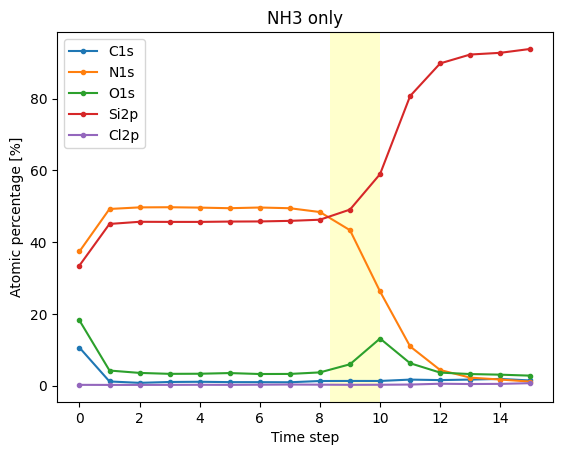

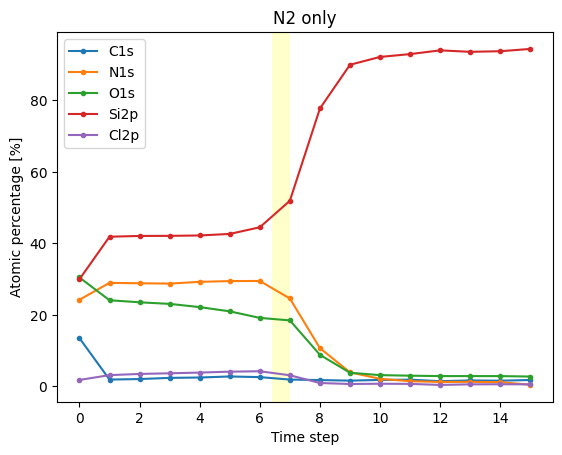

In [22]:
for idx, col in enumerate(NH3.columns[1:]):
    plt.plot(NH3[col], '.-', label=NH3.columns[idx+1])
plt.axvspan(8.347, 10, color='yellow', alpha=0.2, lw=0)
plt.xlabel('Time step')
plt.ylabel('Atomic percentage [%]')
plt.legend()
plt.title('NH3 only')
plt.show()

for idx, col in enumerate(N2.columns[1:]):
    plt.plot(N2[col], '.-', label=N2.columns[idx+1])
plt.axvspan(6.394, 7, color='yellow', alpha=0.2, lw=0)
plt.xlabel('Time step')
plt.ylabel('Atomic percentage [%]')
plt.legend()
plt.title('N2 only')
plt.show()

In [34]:
# interpolate
import numpy as np
NH3_x = np.linspace(8.347, 10.001, 63)
N2_x = np.linspace(6.394, 7.001, 122)

NH3_inter = pd.DataFrame(columns=NH3.columns[1:])
for idx, col in enumerate(NH3.columns[1:]):
    NH3_inter[col] = np.interp(NH3_x, range(len(NH3[col].values)), NH3[col].values)
NH3_inter.index.name = 'cycle'
print(NH3_inter)

N2_inter = pd.DataFrame(columns=N2.columns[1:])
for idx, col in enumerate(N2.columns[1:]):
    N2_inter[col] = np.interp(N2_x, range(len(N2[col].values)), N2[col].values)
N2_inter.index.name = 'cycle'
print(N2_inter)

            C1s        N1s        O1s       Si2p      Cl2p
cycle                                                     
0      1.314705  46.658365   4.496387  47.256557  0.274030
1      1.315177  46.523153   4.556795  47.331950  0.272971
2      1.315648  46.387942   4.617203  47.407343  0.271911
3      1.316120  46.252730   4.677612  47.482736  0.270852
4      1.316592  46.117518   4.738020  47.558129  0.269793
...         ...        ...        ...        ...       ...
58     1.322413  28.071986  12.395830  57.946174  0.263611
59     1.322299  27.616269  12.587367  58.210003  0.264074
60     1.322185  27.160552  12.778905  58.473832  0.264536
61     1.322070  26.704835  12.970442  58.737661  0.264999
62     1.322341  26.250891  13.147909  59.013364  0.265499

[63 rows x 5 columns]
            C1s        N1s        O1s       Si2p      Cl2p
cycle                                                     
0      2.340182  27.556258  18.887951  47.408876  3.806691
1      2.336746  27.531679  18.88